<a href="https://colab.research.google.com/github/nathsmo/Machine-Leaning-Bases/blob/master/Data_Exploration_BASES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalizations

* It is of common use to name your dataframe df, that's why you will find the naming of the dataset in that way.

* Libraries may be imported with a byname, for example: pandas as pd. It's easier to program the library's funtions with smaller names.

#  To Import a file (with pandas library)

### First load the library:

In [ ]:
import pandas as pd #pip install pandas

Seeing that pandas might take longer to load a file there's a another option to read a file and create a pandas dataframe.

In [ ]:
import datatable as dt  # pip install datatble

df = dt.fread("data/file.csv").to_pandas()

## Import dataset with pandas from **file**

In [ ]:
df = pd.read_csv('data/file.csv', sep = ',')
df = pd.DataFrame(data=df)

## Import dataset with pandas from **link**


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', sep = ',')
df = pd.DataFrame(data=df)

## Import dataset with pandas from **excel**

In [ ]:
df = pd.read_excel (r'Path\File name.xlsx')

## Import dataset from **sklearn library**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
target = iris.target
column_names = iris.feature_names
df = pd.DataFrame(data, columns=column_names)

# Data summary visualization

## Search through the head of the dataset (top 5 cells)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Describe for general data
* Summarized visualization for numerical data

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Sum of NA in data

* Show the amount of na data on the dataset by variable.

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Correlation mapping with plots (Heatmap)

La version simple:

In [ ]:
import matplotlib.pyplot as plt

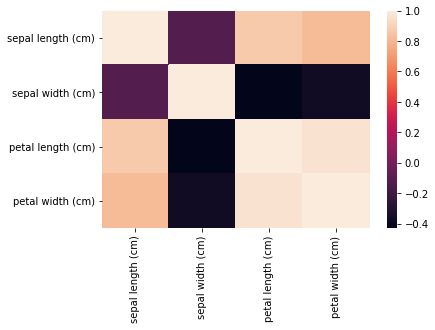

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

Pretty version:


In [ ]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

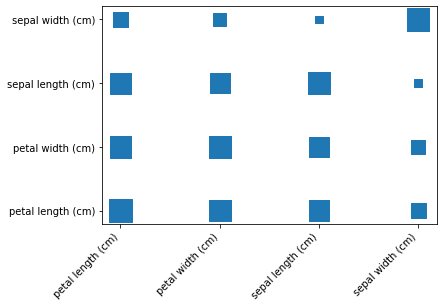

In [ ]:
corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## Complete Histogram visualization (with seaborn)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


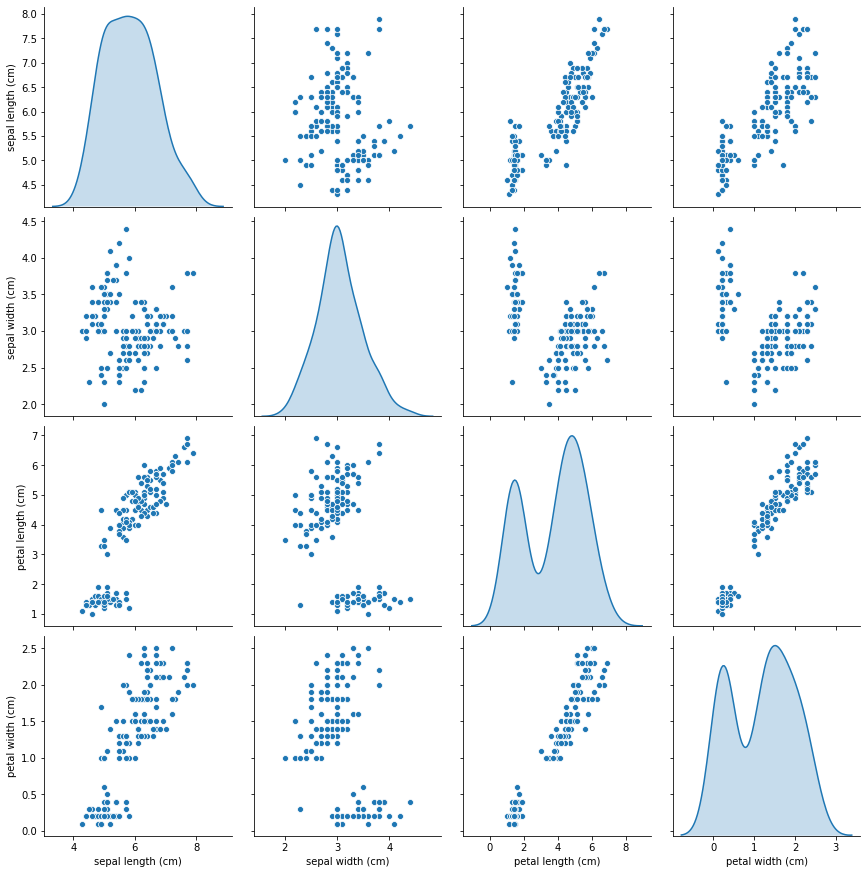

In [ ]:
sns.pairplot(df, size=3, diag_kind="kde")
# You can algo use - hue = "Tag" - in order to visualize the data by gourping like species

## Andrew Curves (with pandas)

In [ ]:
#Adding string object to visualize the results

target = target.tolist()
target = pd.DataFrame(target) 
target = target.replace(0, 'Iris-setosa')
target = target.replace(1, 'Iris-versicolor')
target = target.replace(2, 'Iris-virginica')
df['target'] = target


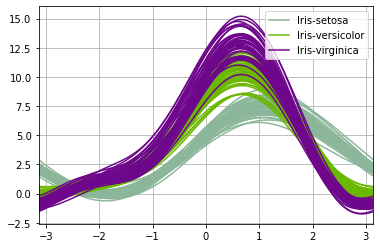

In [ ]:
from pandas.plotting import andrews_curves

andrews_curves(df[:-1], "target")

## Separate data into Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.25, random_state=42)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

## Tips for data analysis

Whenever you find yourself itching to use some looping functions like apply, applymap or itertuples, take a moment to see if the task can be vectorized. ([reference](https://medium.com/towards-artificial-intelligence/6-pandas-mistakes-that-silently-tell-you-are-a-rookie-f075c91595e))

Reduce memory usage with this function that converts the columns of a dataframe according to the type needed. ([reference](https://medium.com/towards-artificial-intelligence/6-pandas-mistakes-that-silently-tell-you-are-a-rookie-f075c91595e))

In [ ]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

* You can always 'style' a dataframe to show the mean/top/lower values with different colors.([reference](https://medium.com/towards-artificial-intelligence/6-pandas-mistakes-that-silently-tell-you-are-a-rookie-f075c91595e))
* Try to save your dataframes to some other lighter and cheaper format like feather or parquet.([reference](https://medium.com/towards-artificial-intelligence/6-pandas-mistakes-that-silently-tell-you-are-a-rookie-f075c91595e))